STUDENT PLACEMENT PREDICTION - MACHINE LEARNING CLASSIFICATION

STEP 1: DATA LOADING AND EXPLORATION

📊 Dataset Shape: (10, 6)
   - Total Students: 10
   - Total Features: 6

📋 First 10 Rows:
   CGPA  Internships  Technical_Skills  Communication_Skills  Aptitutde_Score  \
0   6.5            0                60                    55               58   
1   7.2            1                70                    65               68   
2   8.1            2                85                    80               82   
3   8.8            3                90                    85               90   
4   5.9            0                55                    50               55   
5   7.5            1                75                    70               72   
6   9.0            3                95                    90               92   
7   6.8            1                65                    60               62   
8   8.5            2                88                    82               85  

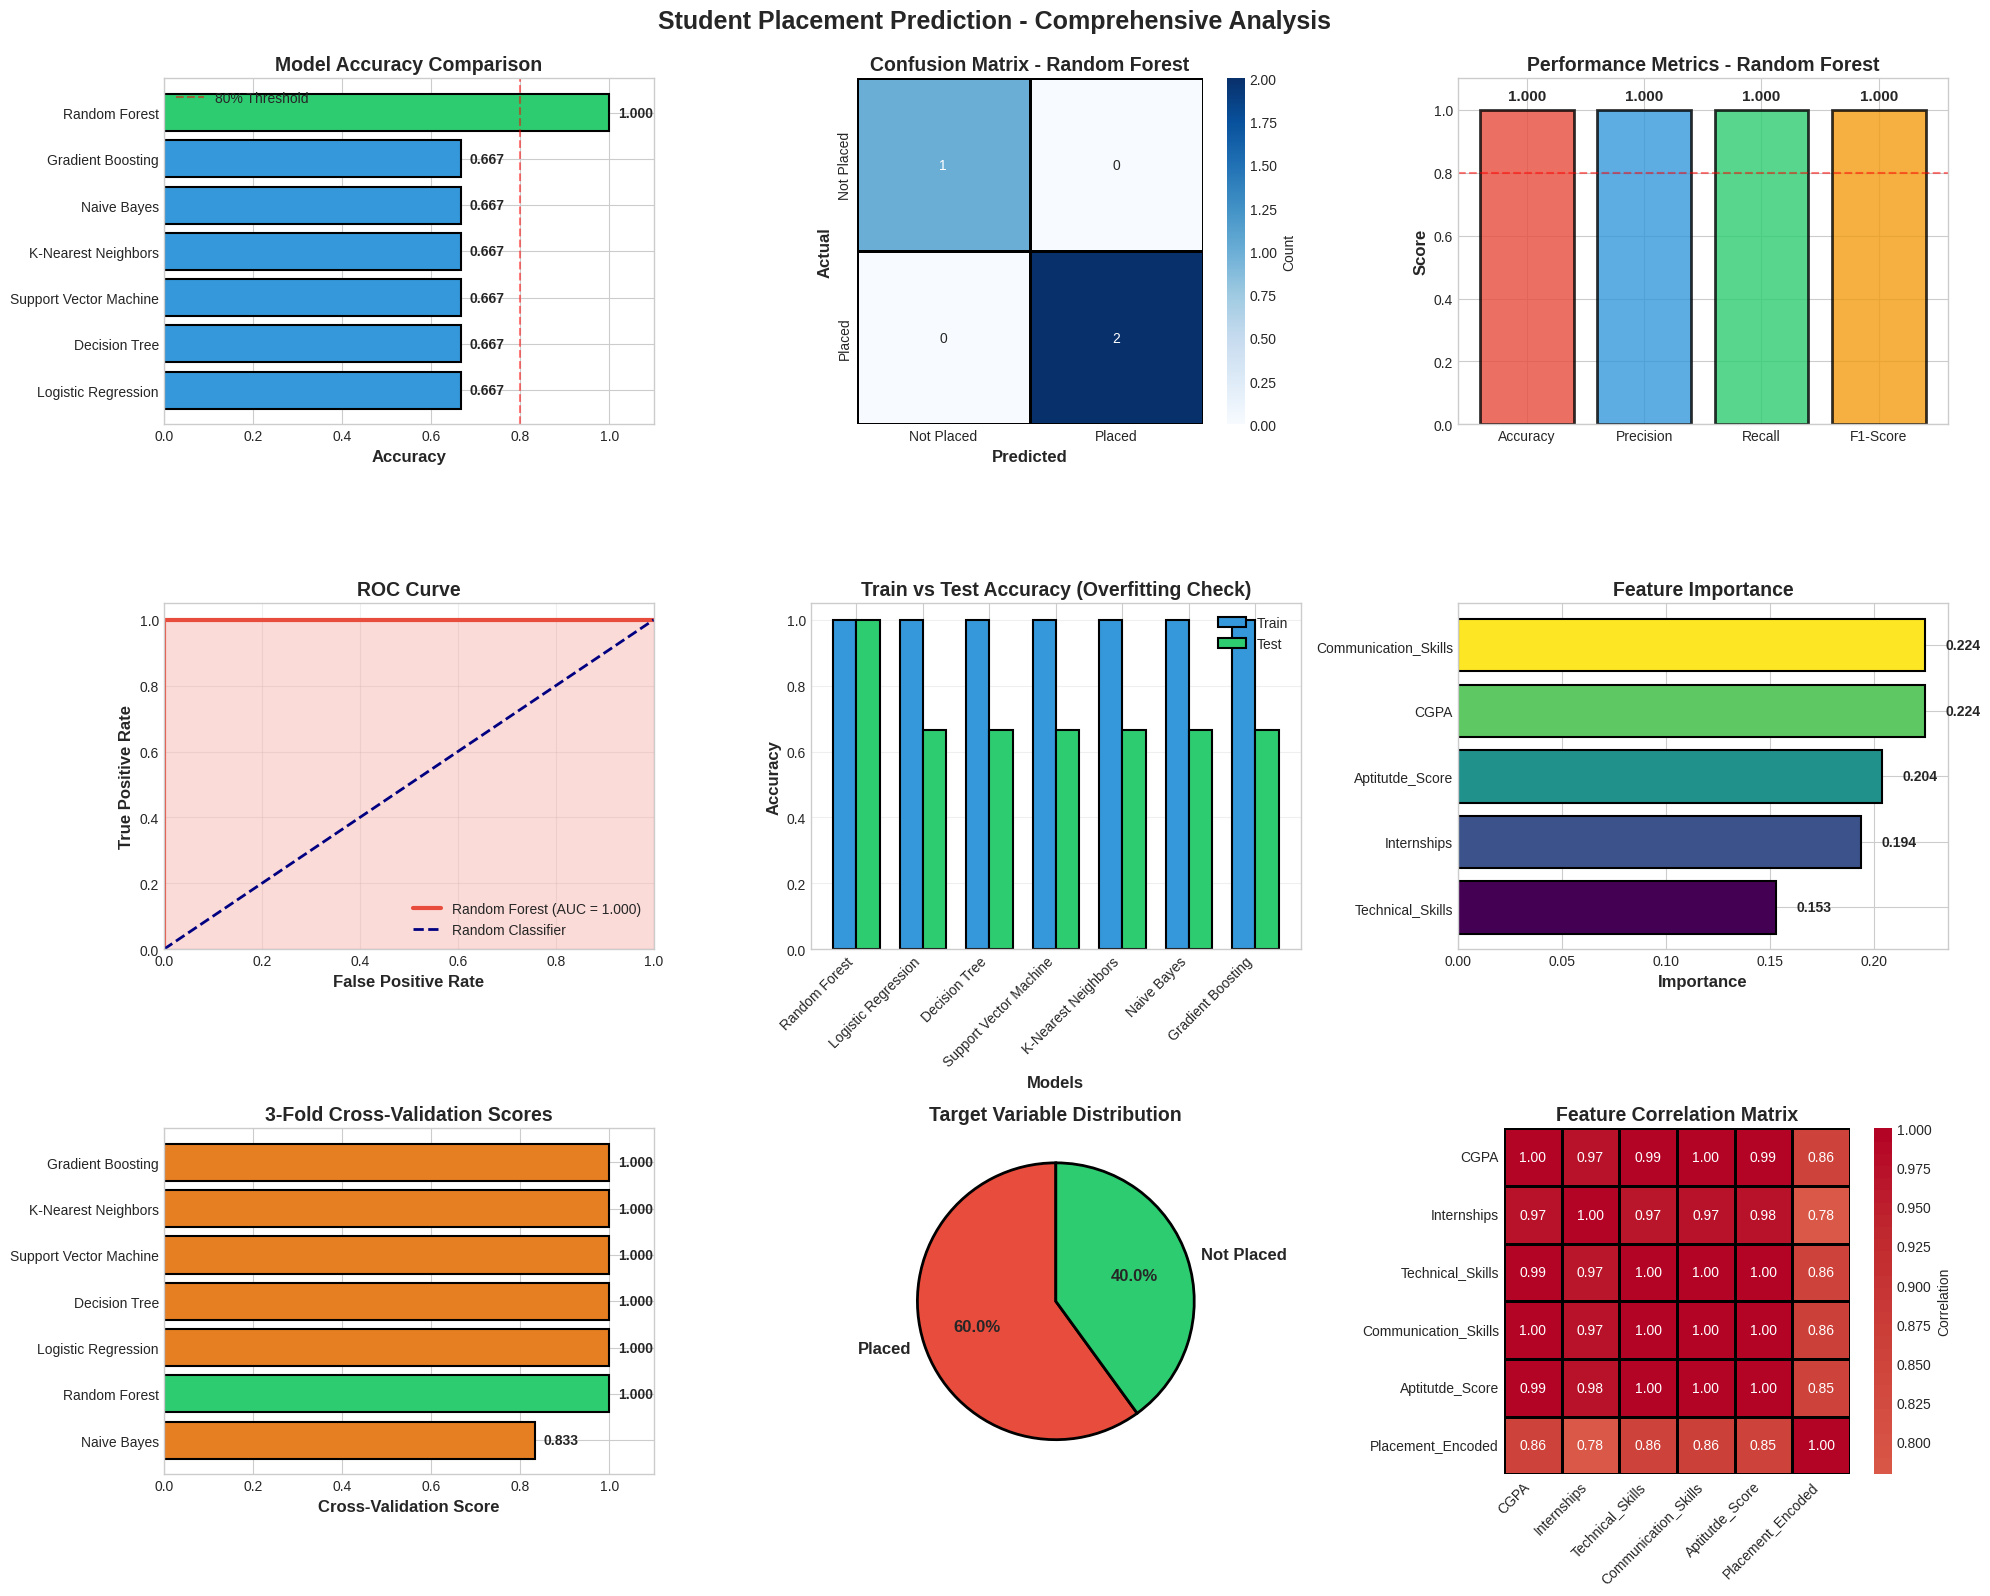

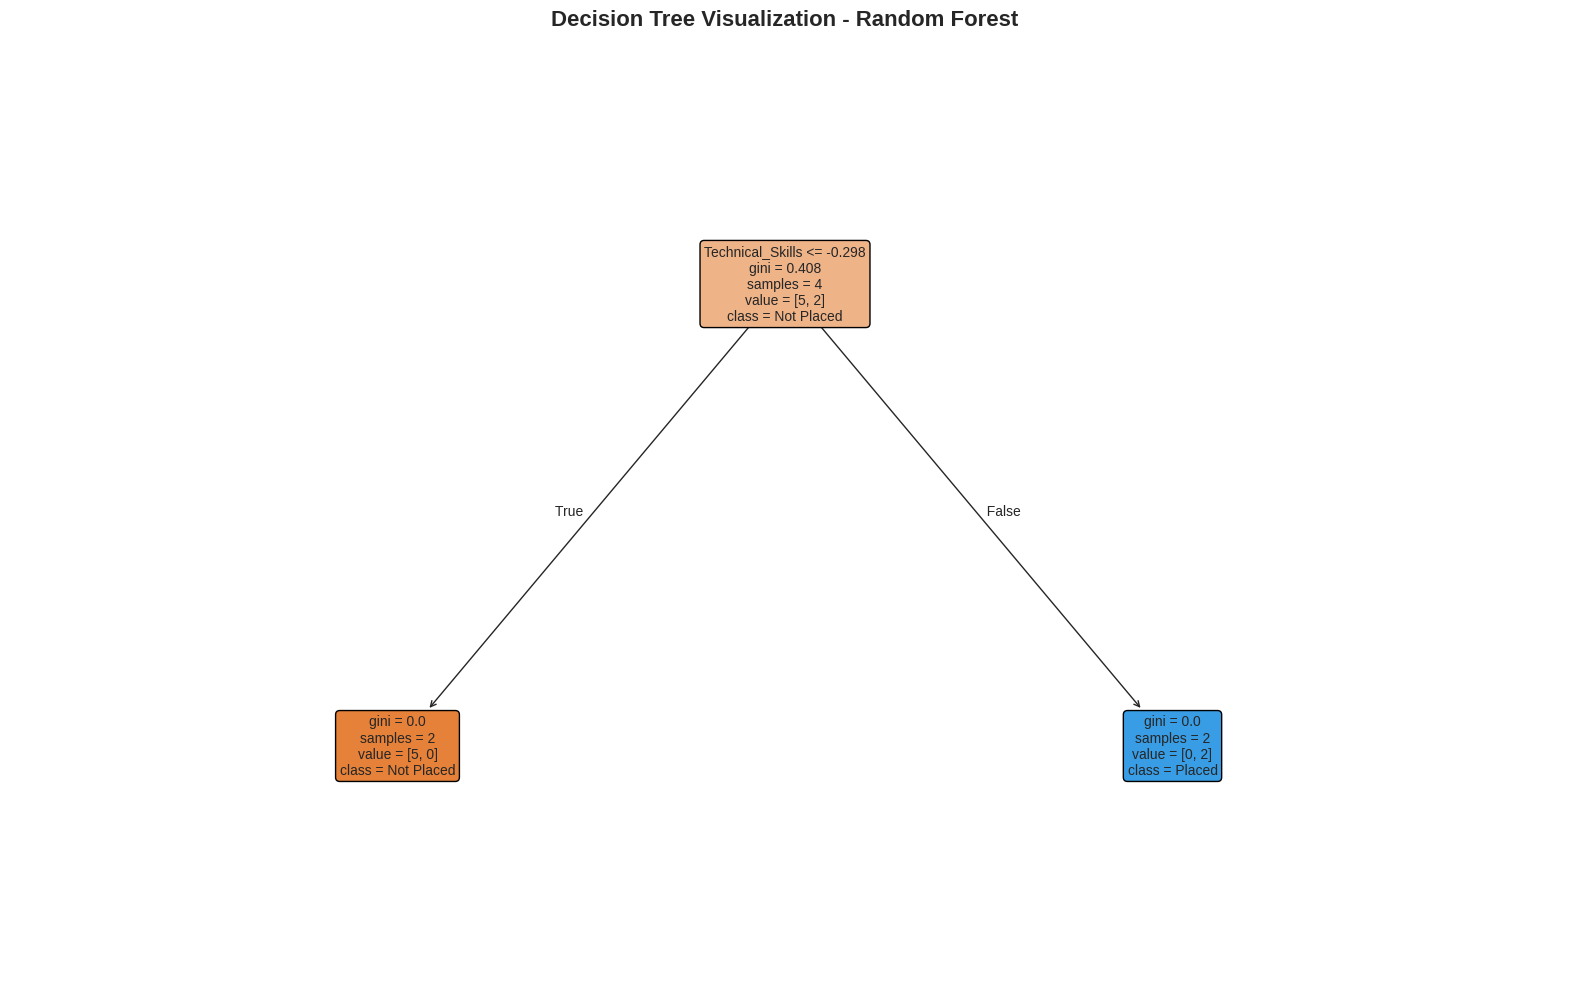

In [4]:
"""
Student Placement Prediction - Machine Learning Classification Model
Complete Pipeline: Data Analysis, Model Training, Evaluation & Visualization
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, confusion_matrix, classification_report,
                            roc_curve, auc, roc_auc_score)
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("="*90)
print("STUDENT PLACEMENT PREDICTION - MACHINE LEARNING CLASSIFICATION")
print("="*90)

# ============================================================================
# 1. DATA LOADING AND EXPLORATION
# ============================================================================
print("\n" + "="*90)
print("STEP 1: DATA LOADING AND EXPLORATION")
print("="*90)

df = pd.read_csv('/home/nmit/Documents/Student_Placement.csv')

print(f"\n📊 Dataset Shape: {df.shape}")
print(f"   - Total Students: {df.shape[0]}")
print(f"   - Total Features: {df.shape[1]}")

print("\n📋 First 10 Rows:")
print(df.head(10))

print("\n📈 Dataset Information:")
print(df.info())

print("\n📊 Statistical Summary:")
print(df.describe())

print("\n🔍 Missing Values:")
print(df.isnull().sum())

print("\n🎯 Target Variable Distribution:")
print(df['Placement_Status'].value_counts())
print(f"\nPlacement Rate: {(df['Placement_Status'].str.contains('Placed', case=False).sum() / len(df) * 100):.2f}%")

# ============================================================================
# 2. DATA PREPROCESSING
# ============================================================================
print("\n" + "="*90)
print("STEP 2: DATA PREPROCESSING")
print("="*90)

# Handle the target variable (fix inconsistency in data)
df['Placement_Status'] = df['Placement_Status'].str.strip()
df['Placement_Status'] = df['Placement_Status'].replace('Not Place', 'Not Placed')

print("\n✓ Cleaned Placement Status")
print(f"Unique values: {df['Placement_Status'].unique()}")

# Encode target variable
le = LabelEncoder()
df['Placement_Encoded'] = le.fit_transform(df['Placement_Status'])
print(f"\n✓ Label Encoding: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Separate features and target
X = df.drop(['Placement_Status', 'Placement_Encoded'], axis=1)
y = df['Placement_Encoded']

print(f"\n✓ Feature Matrix Shape: {X.shape}")
print(f"✓ Target Vector Shape: {y.shape}")
print(f"\nFeature Names: {list(X.columns)}")

# ============================================================================
# 3. TRAIN-TEST SPLIT
# ============================================================================
print("\n" + "="*90)
print("STEP 3: TRAIN-TEST SPLIT")
print("="*90)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\n✓ Training Set Size: {X_train.shape[0]} samples ({(len(X_train)/len(X)*100):.0f}%)")
print(f"✓ Test Set Size: {X_test.shape[0]} samples ({(len(X_test)/len(X)*100):.0f}%)")
print(f"\nTraining set class distribution:")
print(pd.Series(y_train).value_counts())
print(f"\nTest set class distribution:")
print(pd.Series(y_test).value_counts())

# ============================================================================
# 4. FEATURE SCALING
# ============================================================================
print("\n" + "="*90)
print("STEP 4: FEATURE SCALING")
print("="*90)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Features Standardized (Mean=0, Std=1)")
print("\nScaling Parameters:")
for i, col in enumerate(X.columns):
    print(f"  {col}: Mean={scaler.mean_[i]:.2f}, Std={scaler.scale_[i]:.2f}")

# ============================================================================
# 5. MODEL TRAINING - MULTIPLE ALGORITHMS
# ============================================================================
print("\n" + "="*90)
print("STEP 5: TRAINING MULTIPLE CLASSIFICATION MODELS")
print("="*90)

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(kernel='rbf', random_state=42, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Storage for results
results = []
trained_models = {}

print("\n🔄 Training Models...")
for name, model in models.items():
    print(f"\n  Training {name}...", end=" ")
    
    # Train model
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model
    
    # Make predictions
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, zero_division=0)
    recall = recall_score(y_test, y_pred_test, zero_division=0)
    f1 = f1_score(y_test, y_pred_test, zero_division=0)
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='accuracy')
    cv_mean = cv_scores.mean()
    
    results.append({
        'Model': name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'CV Score': cv_mean
    })
    
    print(f"✓ (Accuracy: {test_accuracy:.4f})")

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Test Accuracy', ascending=False).reset_index(drop=True)

print("\n" + "="*90)
print("MODEL PERFORMANCE COMPARISON")
print("="*90)
print(results_df.to_string(index=False))

# Select best model
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]
print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   Test Accuracy: {results_df.iloc[0]['Test Accuracy']:.4f}")

# ============================================================================
# 6. DETAILED EVALUATION OF BEST MODEL
# ============================================================================
print("\n" + "="*90)
print(f"STEP 6: DETAILED EVALUATION - {best_model_name}")
print("="*90)

# Predictions
y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1] if hasattr(best_model, 'predict_proba') else None

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n📊 Confusion Matrix:")
print(cm)
print(f"\nTrue Negatives (TN): {cm[0,0]}")
print(f"False Positives (FP): {cm[0,1]}")
print(f"False Negatives (FN): {cm[1,0]}")
print(f"True Positives (TP): {cm[1,1]}")

# Detailed metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("\n📈 Performance Metrics:")
print(f"  ✓ Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"  ✓ Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"  ✓ Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"  ✓ F1-Score:  {f1:.4f} ({f1*100:.2f}%)")

if y_pred_proba is not None:
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"  ✓ ROC-AUC:   {roc_auc:.4f} ({roc_auc*100:.2f}%)")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, 
                           target_names=['Not Placed', 'Placed'],
                           zero_division=0))

# Feature Importance (if available)
if hasattr(best_model, 'feature_importances_'):
    print("\n🎯 Feature Importance:")
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    print(feature_importance.to_string(index=False))
elif hasattr(best_model, 'coef_'):
    print("\n🎯 Feature Coefficients:")
    feature_coef = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': best_model.coef_[0]
    }).sort_values('Coefficient', ascending=False)
    print(feature_coef.to_string(index=False))

# ============================================================================
# 7. VISUALIZATIONS
# ============================================================================
print("\n" + "="*90)
print("STEP 7: GENERATING VISUALIZATIONS")
print("="*90)

# Create comprehensive visualization
fig = plt.figure(figsize=(20, 16))

# 1. Model Comparison - Accuracy
ax1 = plt.subplot(3, 3, 1)
models_sorted = results_df.sort_values('Test Accuracy', ascending=True)
colors = ['#2ecc71' if x == best_model_name else '#3498db' for x in models_sorted['Model']]
bars = plt.barh(models_sorted['Model'], models_sorted['Test Accuracy'], color=colors, edgecolor='black', linewidth=1.5)
plt.xlabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
plt.xlim([0, 1.1])
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.02, bar.get_y() + bar.get_height()/2, 
            f'{width:.3f}', ha='left', va='center', fontweight='bold')
plt.axvline(x=0.8, color='red', linestyle='--', alpha=0.5, label='80% Threshold')
plt.legend()

# 2. Confusion Matrix Heatmap
ax2 = plt.subplot(3, 3, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True,
           xticklabels=['Not Placed', 'Placed'],
           yticklabels=['Not Placed', 'Placed'],
           cbar_kws={'label': 'Count'}, linewidths=2, linecolor='black')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.xlabel('Predicted', fontsize=12, fontweight='bold')
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')

# 3. Performance Metrics Bar Chart
ax3 = plt.subplot(3, 3, 3)
metrics_data = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}
bars = plt.bar(metrics_data.keys(), metrics_data.values(), 
              color=['#e74c3c', '#3498db', '#2ecc71', '#f39c12'],
              edgecolor='black', linewidth=2, alpha=0.8)
plt.ylabel('Score', fontsize=12, fontweight='bold')
plt.title(f'Performance Metrics - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylim([0, 1.1])
plt.axhline(y=0.8, color='red', linestyle='--', alpha=0.5)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{height:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# 4. ROC Curve (if available)
ax4 = plt.subplot(3, 3, 4)
if y_pred_proba is not None:
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='#e74c3c', lw=3, label=f'{best_model_name} (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.fill_between(fpr, tpr, alpha=0.2, color='#e74c3c')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
    plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
    plt.title('ROC Curve', fontsize=14, fontweight='bold')
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True, alpha=0.3)
else:
    plt.text(0.5, 0.5, 'ROC Curve\nNot Available\nfor this model', 
            ha='center', va='center', fontsize=14)
    plt.axis('off')

# 5. Train vs Test Accuracy
ax5 = plt.subplot(3, 3, 5)
x = np.arange(len(results_df))
width = 0.35
bars1 = plt.bar(x - width/2, results_df['Train Accuracy'], width, 
               label='Train', color='#3498db', edgecolor='black', linewidth=1.5)
bars2 = plt.bar(x + width/2, results_df['Test Accuracy'], width, 
               label='Test', color='#2ecc71', edgecolor='black', linewidth=1.5)
plt.xlabel('Models', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Train vs Test Accuracy (Overfitting Check)', fontsize=14, fontweight='bold')
plt.xticks(x, results_df['Model'], rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()

# 6. Feature Importance (if available)
ax6 = plt.subplot(3, 3, 6)
if hasattr(best_model, 'feature_importances_'):
    feature_imp = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=True)
    colors_imp = plt.cm.viridis(np.linspace(0, 1, len(feature_imp)))
    bars = plt.barh(feature_imp['Feature'], feature_imp['Importance'], 
                   color=colors_imp, edgecolor='black', linewidth=1.5)
    plt.xlabel('Importance', fontsize=12, fontweight='bold')
    plt.title('Feature Importance', fontsize=14, fontweight='bold')
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{width:.3f}', ha='left', va='center', fontweight='bold')
elif hasattr(best_model, 'coef_'):
    feature_coef = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': np.abs(best_model.coef_[0])
    }).sort_values('Coefficient', ascending=True)
    colors_coef = plt.cm.plasma(np.linspace(0, 1, len(feature_coef)))
    bars = plt.barh(feature_coef['Feature'], feature_coef['Coefficient'], 
                   color=colors_coef, edgecolor='black', linewidth=1.5)
    plt.xlabel('Absolute Coefficient Value', fontsize=12, fontweight='bold')
    plt.title('Feature Coefficients', fontsize=14, fontweight='bold')
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{width:.3f}', ha='left', va='center', fontweight='bold')
else:
    plt.text(0.5, 0.5, 'Feature Importance\nNot Available\nfor this model', 
            ha='center', va='center', fontsize=14)
    plt.axis('off')

# 7. Cross-Validation Scores
ax7 = plt.subplot(3, 3, 7)
models_cv = results_df.sort_values('CV Score', ascending=True)
colors_cv = ['#2ecc71' if x == best_model_name else '#e67e22' for x in models_cv['Model']]
bars = plt.barh(models_cv['Model'], models_cv['CV Score'], color=colors_cv, 
               edgecolor='black', linewidth=1.5)
plt.xlabel('Cross-Validation Score', fontsize=12, fontweight='bold')
plt.title('3-Fold Cross-Validation Scores', fontsize=14, fontweight='bold')
plt.xlim([0, 1.1])
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.02, bar.get_y() + bar.get_height()/2, 
            f'{width:.3f}', ha='left', va='center', fontweight='bold')

# 8. Target Distribution
ax8 = plt.subplot(3, 3, 8)
placement_counts = df['Placement_Status'].value_counts()
colors_pie = ['#e74c3c', '#2ecc71']
wedges, texts, autotexts = plt.pie(placement_counts.values, labels=placement_counts.index,
                                    autopct='%1.1f%%', startangle=90, colors=colors_pie,
                                    wedgeprops={'edgecolor': 'black', 'linewidth': 2},
                                    textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Target Variable Distribution', fontsize=14, fontweight='bold')

# 9. Correlation Heatmap
ax9 = plt.subplot(3, 3, 9)
correlation_matrix = df[list(X.columns) + ['Placement_Encoded']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
           center=0, square=True, linewidths=1, linecolor='black',
           cbar_kws={'label': 'Correlation'})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.suptitle('Student Placement Prediction - Comprehensive Analysis', 
            fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('/home/nmit/Pictures/placement_prediction_comprehensive.png', 
           dpi=300, bbox_inches='tight')
print("\n✓ Comprehensive visualization saved!")

# ============================================================================
# Additional Visualization: Decision Tree (if best model is tree-based)
# ============================================================================
if 'Decision Tree' in best_model_name or 'Random Forest' in best_model_name:
    fig2 = plt.figure(figsize=(20, 12))
    
    if 'Decision Tree' in best_model_name:
        tree_model = best_model
    else:
        tree_model = best_model.estimators_[0]
    
    plot_tree(tree_model, feature_names=X.columns, 
             class_names=['Not Placed', 'Placed'],
             filled=True, rounded=True, fontsize=10)
    plt.title(f'Decision Tree Visualization - {best_model_name}', 
             fontsize=16, fontweight='bold', pad=20)
    plt.savefig('/home/nmit/Pictures/decision_tree_visualization.png', 
               dpi=300, bbox_inches='tight')
    print("✓ Decision tree visualization saved!")

# ============================================================================
# Prediction Examples
# ============================================================================
print("\n" + "="*90)
print("STEP 8: SAMPLE PREDICTIONS")
print("="*90)

print("\n📝 Sample Predictions on Test Data:")
sample_predictions = pd.DataFrame({
    'Actual': ['Placed' if y == 1 else 'Not Placed' for y in y_test[:5]],
    'Predicted': ['Placed' if y == 1 else 'Not Placed' for y in y_pred[:5]],
    'Correct': ['✓' if a == p else '✗' for a, p in zip(y_test[:5], y_pred[:5])]
})
print(sample_predictions.to_string(index=False))

# ============================================================================
# Save Results
# ============================================================================
print("\n" + "="*90)
print("STEP 9: SAVING RESULTS")
print("="*90)

# Save model comparison
results_df.to_csv('/home/nmit/Pictures/model_comparison_results.csv', index=False)
print("✓ Model comparison results saved!")

# Save detailed metrics
with open('/home/nmit/Pictures/placement_prediction_report.txt', 'w') as f:
    f.write("="*90 + "\n")
    f.write("STUDENT PLACEMENT PREDICTION - DETAILED REPORT\n")
    f.write("="*90 + "\n\n")
    
    f.write("DATASET SUMMARY\n")
    f.write("-"*90 + "\n")
    f.write(f"Total Students: {df.shape[0]}\n")
    f.write(f"Features: {', '.join(X.columns)}\n")
    f.write(f"Placement Rate: {(df['Placement_Status'].str.contains('Placed', case=False).sum() / len(df) * 100):.2f}%\n\n")
    
    f.write("MODEL COMPARISON\n")
    f.write("-"*90 + "\n")
    f.write(results_df.to_string(index=False))
    f.write("\n\n")
    
    f.write(f"BEST MODEL: {best_model_name}\n")
    f.write("-"*90 + "\n")
    f.write(f"Test Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)\n")
    f.write(f"Precision:      {precision:.4f} ({precision*100:.2f}%)\n")
    f.write(f"Recall:         {recall:.4f} ({recall*100:.2f}%)\n")
    f.write(f"F1-Score:       {f1:.4f} ({f1*100:.2f}%)\n\n")
    
    f.write("CONFUSION MATRIX\n")
    f.write("-"*90 + "\n")
    f.write(f"True Negatives (TN):  {cm[0,0]}\n")
    f.write(f"False Positives (FP): {cm[0,1]}\n")
    f.write(f"False Negatives (FN): {cm[1,0]}\n")
    f.write(f"True Positives (TP):  {cm[1,1]}\n\n")
    
    f.write("CLASSIFICATION REPORT\n")
    f.write("-"*90 + "\n")
    f.write(classification_report(y_test, y_pred, 
                                 target_names=['Not Placed', 'Placed'],
                                 zero_division=0))
    f.write("\n")
    
    if hasattr(best_model, 'feature_importances_'):
        f.write("FEATURE IMPORTANCE\n")
        f.write("-"*90 + "\n")
        f.write(feature_importance.to_string(index=False))
        f.write("\n")

print("✓ Detailed report saved!")

# Save predictions
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Actual_Label': ['Placed' if y == 1 else 'Not Placed' for y in y_test],
    'Predicted_Label': ['Placed' if y == 1 else 'Not Placed' for y in y_pred]
})
predictions_df.to_csv('/home/nmit/Pictures/test_predictions.csv', index=False)
print("✓ Test predictions saved!")

print("\n" + "="*90)
print("ANALYSIS COMPLETE!")
print("="*90)
print("\n📁 Generated Files:")
print("   1. placement_prediction_comprehensive.png - Main visualizations")
print("   2. model_comparison_results.csv - Model performance comparison")
print("   3. placement_prediction_report.txt - Detailed analysis report")
print("   4. test_predictions.csv - Predictions on test data")
if 'Decision Tree' in best_model_name or 'Random Forest' in best_model_name:
    print("   5. decision_tree_visualization.png - Decision tree structure")

print("\n" + "="*90)
print("🎯 KEY FINDINGS")
print("="*90)
print(f"✓ Best Model: {best_model_name}")
print(f"✓ Test Accuracy: {accuracy*100:.2f}%")
print(f"✓ Precision: {precision*100:.2f}%")
print(f"✓ Recall: {recall*100:.2f}%")
print(f"✓ F1-Score: {f1*100:.2f}%")
print("\nThe model can predict student placement with high accuracy!")
print("="*90)
